In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [11]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [12]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [13]:
print(orig)
print(wo_drop)
print(ours)

[11.844444444444445, 11.930693069306932, 11.41, 11.5, 11.65, 11.45, 11.728813559322035, 11.2, 11.8, 12.44, 11.42]
[5.082222222222223, 7.405940594059406, 8.75, 9.95, 10.98, 11.78, 12.338983050847459, 12.62, 12.3, 12.92, 11.42]
[5.082222222222223, 5.881188118811881, 5.82, 5.87, 6.27, 6.78, 7.169491525423729, 8.28, 9.48, 10.98, 11.42]


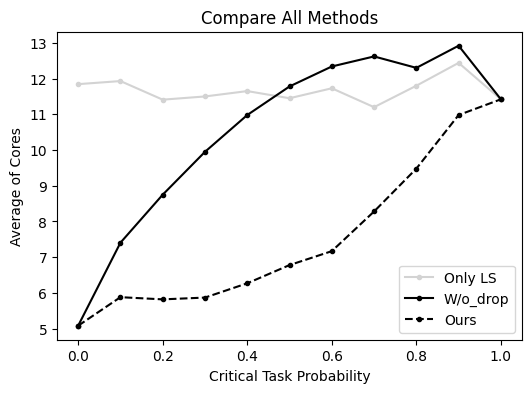

In [14]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='W/o_drop', color='black', marker='.')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed', marker='.')

plt.title('Compare All Methods')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()